In [12]:
#28/8/24 Due to the large number of hyperparameters in Neural Networks this script batch tests many
import gc
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pandas as pd
import numpy as np
import math
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
sys.path.insert(1, '/Users/james/Documents/Honours/Python')
from Function_Repo import metriccalc 
from Function_Repo import nnmetrics
from Function_Repo import setbalance
import math
import tensorflow as tf
from tensorflow import keras
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt

seed = 81
df = pd.read_csv('/Users/james/Documents/Honours/Data/Chemopy/datasets/NR-AR-LBD_Chemopy.csv')
df = setbalance(df)
df = df.dropna()
dfarray, tempset = train_test_split(df, test_size=0.2, 
                                    random_state=seed, stratify = df['Toxicity_Value'])

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 200, 1)]          0         
                                                                 
 flatten_17 (Flatten)        (None, 200)               0         
                                                                 
 dense_39 (Dense)            (None, 595)               119595    
                                                                 
 dense_40 (Dense)            (None, 1)                 596       
                                                                 
Total params: 120,191
Trainable params: 120,191
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 2ms/step


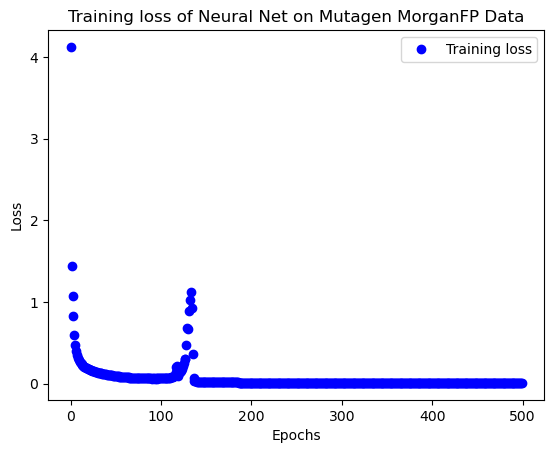

2/2 [==============================] - 0s 990us/step
for fold 1 optimal test mcc of 0.5128205128205128 validation mcc of 0.5774657738960309
Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 200, 1)]          0         
                                                                 
 flatten_18 (Flatten)        (None, 200)               0         
                                                                 
 dense_41 (Dense)            (None, 597)               119997    
                                                                 
 dense_42 (Dense)            (None, 1)                 598       
                                                                 
Total params: 120,595
Trainable params: 120,595
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s

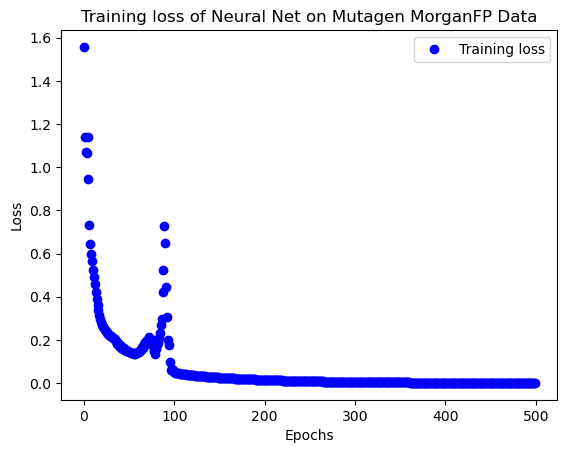

2/2 [==============================] - 0s 855us/step
for fold 2 optimal test mcc of 0.5131986876608863 validation mcc of 0.6262497055163235
Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 200, 1)]          0         
                                                                 
 flatten_19 (Flatten)        (None, 200)               0         
                                                                 
 dense_43 (Dense)            (None, 597)               119997    
                                                                 
 dense_44 (Dense)            (None, 1)                 598       
                                                                 
Total params: 120,595
Trainable params: 120,595
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s

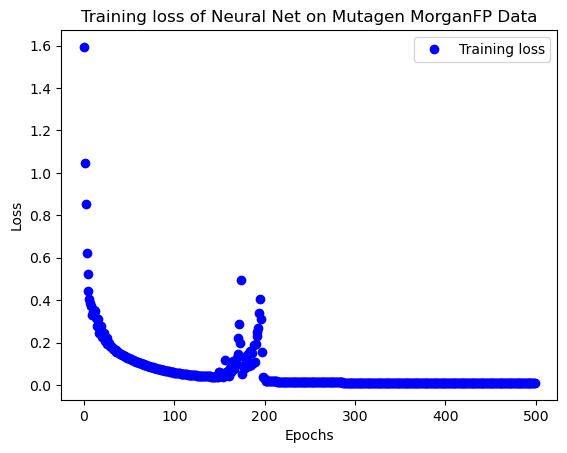

2/2 [==============================] - 0s 819us/step
for fold 3 optimal test mcc of 0.6784926451795892 validation mcc of 0.7794518269281766
Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 200, 1)]          0         
                                                                 
 flatten_20 (Flatten)        (None, 200)               0         
                                                                 
 dense_45 (Dense)            (None, 597)               119997    
                                                                 
 dense_46 (Dense)            (None, 1)                 598       
                                                                 
Total params: 120,595
Trainable params: 120,595
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s

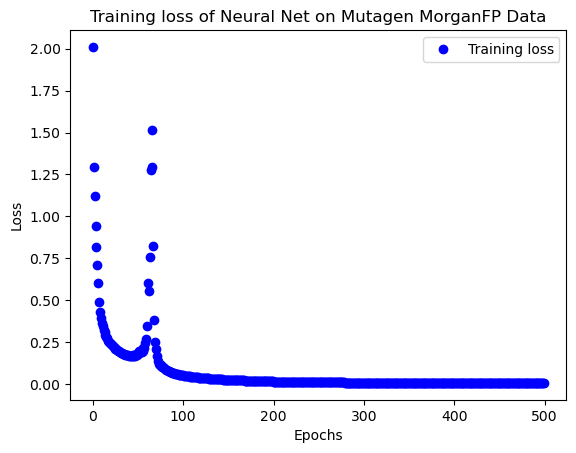

2/2 [==============================] - 0s 1ms/step
for fold 4 optimal test mcc of 0.6428785635743144 validation mcc of 0.6490229342872016
Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 200, 1)]          0         
                                                                 
 flatten_21 (Flatten)        (None, 200)               0         
                                                                 
 dense_47 (Dense)            (None, 603)               121203    
                                                                 
 dense_48 (Dense)            (None, 1)                 604       
                                                                 
Total params: 121,807
Trainable params: 121,807
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 1

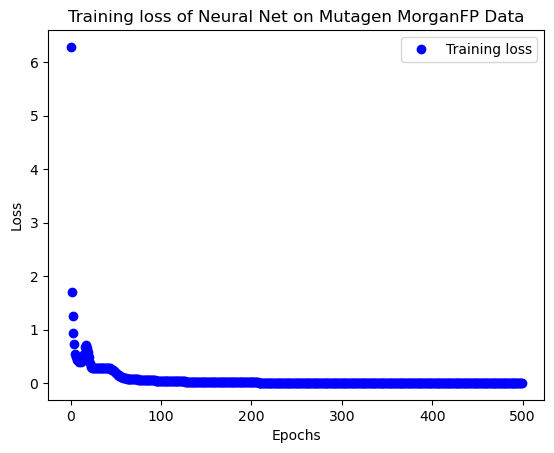

2/2 [==============================] - 0s 943us/step
for fold 5 optimal test mcc of 0.6080052052987127 validation mcc of 0.7181324987175317

validation metrics of:
positives in data 45
negatives in data 49
net accuracy = 0.7872340425531915
mcc = 0.604787912224893


<function gc.collect(generation=2)>

In [14]:
df = df.dropna()
dfarray = df.to_numpy()

dfarray, tempset = train_test_split(dfarray, test_size=0.2, 
                                    random_state=seed, stratify = df['Toxicity_Value'])

size = len(dfarray) / 5
splitsize = math.ceil(size)
empty = [[] for _ in range(5)]
splits = []
for list in empty:
    splits.append(list)

loops = 0
currsplit = 0
#Results in a list of 5 lists that each contain 1/5 of the targetdata
for row in dfarray:
    splits[currsplit].append(row)
    if loops == splitsize:
        loops = 0
        currsplit = currsplit + 1
    loops = loops + 1

folds = []
for split in splits:
    temp = pd.DataFrame(split)
    folds.append(temp)

model_list = []
validlist = []
totalmetrics = []
testdat = []
threshlist = []
finalresults = []
#For loop that uses each fold once for valid/testing and the rest for training
#Each 'split' in the range corresponds to the set used for test/validation with the other 4 for training
iteration = 1
print('========================================')
for split in range(0,5):
    #Set creation
    trainlist = [df for i, df in enumerate(folds) if i != split]
    trainset = pd.concat(trainlist, axis=0)
    testset, validset = train_test_split(folds[split], test_size=0.5, random_state=seed)

    ytrain = trainset[0].values
    xtrain = trainset.iloc[:, 1:]

    ytest = testset[0].values
    xtest = testset.iloc[:, 1:]

    yvalid = validset[0].values
    xvalid = validset.iloc[:, 1:]

    #lists of metric values
    mcclist = []
    bestmetrics = 1
    maxval = 0


    keras.utils.set_random_seed(seed)
    tf.config.experimental.enable_op_determinism()
    length = len(xtrain.columns)
    sampcount = len(ytrain)
    temp = length
    # Encoder Creation
    enc_in = keras.Input(shape=(length, 1))
    x = keras.layers.Flatten()(enc_in)
    # Additional encoder layers

    #layer1 = math.sqrt(3*sampcount) + 2*(math.sqrt(sampcount/(3)))
    layer1 = 2*sampcount + 1
    x = keras.layers.Dense(layer1, activation="relu")(x)

#    layer2 = math.sqrt(sampcount / 3)
#    x = keras.layers.Dense(layer2, activation="relu")(x)

    enc_out = keras.layers.Dense(1, activation="sigmoid")(x)
    autoencoder = keras.Model(enc_in, enc_out, name='autoencoder')
    # Optimiser

    optimise = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)

    autoencoder.compile(optimise, loss='binary_crossentropy')

    ytrain = np.array(ytrain)
    epochs = 500
    batchsize = 16
    losshistory = []

    minloss = 1
    bestepoch = 0
    for epoch in range(epochs):
        verb = 0
        logs = autoencoder.fit(
        xtrain,
        ytrain,
        verbose = verb,
        epochs=1,
        batch_size=batchsize),
        validation_split=0.2,

        #autoencoder.save(str(f"models/AE-{epoch+1}.keras"))
        loss = logs[0].history['loss'][0]
        losshistory.append(loss)
        if loss < minloss:
            minloss = loss
            bestepoch = epoch

    model_list.append(autoencoder)

    preds = autoencoder.predict(xtest)
    
    import matplotlib.pyplot as plt
    epochcount = range(epochs)
    plt.figure()
    plt.plot(epochcount, losshistory, 'bo', label='Training loss')
    plt.title('Training loss of Neural Net on Mutagen MorganFP Data')
    plt.legend()

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    
    epochcount = range(epochs)

    acclist = []
    thresholdlist = []
    maxval = 0
    bestthresh = 0
    for threshold in np.arange(0, 1, 0.01):
        newval = nnmetrics(preds, ytest, threshold)[12]
        acclist.append(newval)
        thresholdlist.append(threshold)
        if newval > maxval:
            maxval = newval
            bestthresh = threshold
    threshlist.append(bestthresh)
    testdat.append(maxval)
    y_values = acclist
    x_values = thresholdlist
    preds = autoencoder.predict(xvalid)
    results = nnmetrics(preds, yvalid, bestthresh)
    validlist.append(results)
    print('for fold', split + 1, 'optimal test mcc of', maxval, 'validation mcc of', results[12])

    iteration = iteration + 1

toxvals = []
fingerprints = []
for row in tempset:
    toxvals.append(row[0])
    fingerprints.append(row[1:])


#calculates consensus of models on each fingerprint in the final validation set
consensuslist = []
predictions = []

for fp in fingerprints:
    consensus = -1
    fp = fp.reshape(1, -1)
    fp = np.asarray(fp).astype('float32')
    #appends each model's prediction to a list
    predlist = []
    for model in model_list:
        preds = model.predict(fp, verbose = 0)
        predlist.append(preds)
    predictions.append(predlist)

    #finds number of 0s in the prediction list
    zercount = 0
    loops = 0
    for modelpreds in predlist:
        if modelpreds < threshlist[loops]:
            zercount = zercount + 1
    loops = loops + 1

    #as there are 5 models, if there are less than 3 0s predicted, the consensus is 1
    if zercount < 3 :
        consensus = 1
    else:
        consensus = 0
    consensuslist.append(consensus)

#calculate and print metrics
results = metriccalc(consensuslist, toxvals)
print('\nvalidation metrics of:')
print('positives in data', results[0])
print('negatives in data', results[1])
print('net accuracy =', results[6])
print('mcc =',results[12])
finalresults.append(results[12])
del autoencoder
gc.collect

In [ ]:
========================================
19/19 [==============================] - 0s 351us/step
19/19 [==============================] - 0s 363us/step
for fold 1 optimal test mcc of 0.5863189694017599 validation mcc of 0.596020780193287
19/19 [==============================] - 0s 336us/step
19/19 [==============================] - 0s 417us/step
for fold 2 optimal test mcc of 0.6133282321180251 validation mcc of 0.6140532573468652
19/19 [==============================] - 0s 395us/step
19/19 [==============================] - 0s 319us/step
for fold 3 optimal test mcc of 0.6167325727873297 validation mcc of 0.5637399618488672
19/19 [==============================] - 0s 520us/step
19/19 [==============================] - 0s 357us/step
for fold 4 optimal test mcc of 0.5914804897125342 validation mcc of 0.600534189953621
19/19 [==============================] - 0s 370us/step
19/19 [==============================] - 0s 468us/step
for fold 5 optimal test mcc of 0.5670749910887523 validation mcc of 0.5549113834403938
WARNING:tensorflow:5 out of the last 42 calls to <function Model.make_predict_function.<locals>.predict_function at 0x29cbb2160> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
WARNING:tensorflow:6 out of the last 43 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2ca6dd580> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.

validation metrics of:
positives in data 840
negatives in data 657
net accuracy = 0.7975951903807615
mcc = 0.5873190277642376

In [2]:
#set creation
trainset, testset = train_test_split(dfarray, test_size=0.2, random_state=seed)

ytrain = trainset['Toxicity_Value'].values
xtrain = trainset.iloc[:, 1:]

ytest = testset['Toxicity_Value'].values
xtest = testset.iloc[:, 1:]

yvalid = tempset['Toxicity_Value'].values
xvalid = tempset.iloc[:, 1:]


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 1)]          0         
                                                                 
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 9577)              1924977   
                                                                 
 dense_1 (Dense)             (None, 1)                 9578      
                                                                 
Total params: 1,934,555
Trainable params: 1,934,555
Non-trainable params: 0
_________________________________________________________________
38/38 [==============================] - 0s 1ms/step


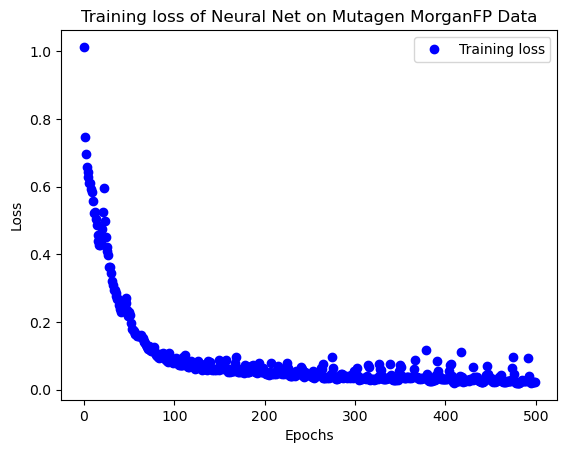

47/47 [==============================] - 0s 1ms/step

validation metrics of:
positives in data 840
negatives in data 657
net accuracy = 0.7962591850367402
mcc = 0.5854271437693336


In [3]:
#parameter adjusting

#lists of metric values
mcclist = []
bestmetrics = 1
maxval = 0

keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()
length = len(xtrain.columns)
sampcount = len(ytrain)
temp = length
# Model Creation
enc_in = keras.Input(shape=(length, 1))
x = keras.layers.Flatten()(enc_in)

#layer1 = math.sqrt(3*sampcount) + 2*(math.sqrt(sampcount/(3)))
layer1 = (2*sampcount + 1)
x = keras.layers.Dense(layer1, activation="relu")(x)

#layer2 = math.sqrt(sampcount / 3)
#x = keras.layers.Dense(layer2, activation="relu")(x)

enc_out = keras.layers.Dense(1, activation="sigmoid")(x)
autoencoder = keras.Model(enc_in, enc_out, name='autoencoder')

optimise = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)

autoencoder.compile(optimise, loss='binary_crossentropy')
autoencoder.summary()

ytrain = np.array(ytrain)
epochs = 500
batchsize = 16
losshistory = []

minloss = 1
bestepoch = 0
for epoch in range(epochs):
    verb = 0
    logs = autoencoder.fit(
    xtrain,
    ytrain,
    verbose = verb,
    epochs=1,
    batch_size=batchsize),
    validation_split=0.2,

    loss = logs[0].history['loss'][0]
    losshistory.append(loss)
    if loss < minloss:
        minloss = loss
        bestepoch = epoch

preds = autoencoder.predict(xtest)

import matplotlib.pyplot as plt
epochcount = range(epochs)
plt.figure()
plt.plot(epochcount, losshistory, 'bo', label='Training loss')
plt.title('Training loss of Neural Net on Mutagen MorganFP Data')
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

epochcount = range(epochs)

acclist = []
thresholdlist = []
maxval = 0
bestthresh = 0
for threshold in np.arange(0, 1, 0.01):
    newval = nnmetrics(preds, ytest, threshold)[12]
    acclist.append(newval)
    thresholdlist.append(threshold)
    if newval > maxval:
        maxval = newval
        bestthresh = threshold
y_values = acclist
x_values = thresholdlist
preds = autoencoder.predict(xvalid)
results = nnmetrics(preds, yvalid, bestthresh)
print('\nvalidation metrics of:')
print('positives in data', results[0])
print('negatives in data', results[1])
print('net accuracy =', results[6])
print('mcc =',results[12])

In [4]:
validation metrics of:
positives in data 840
negatives in data 657
net accuracy = 0.7942551770207081
mcc = 0.5893810722478647

SyntaxError: invalid syntax (1796660645.py, line 1)

In [ ]:
del autoencoder
gc.collect